In [2]:
import plot as p
import matplotlib.pyplot as plt
import numpy as np
import torch as th
from itertools import islice
from pprint import pprint

In [3]:
def getMetric(cfg, m):
  return map(lambda r: th.load(f'toy-runs/{r}/'+ p.runFile(f'toy-runs/{r}'), map_location='cpu')[m],
             islice(p.findRuns(cfg), 3))

def getEpochTimes(cfg):
  return map(lambda x: x[2:], getMetric(cfg, 'epoch_times'))

def getAvgEpochTimes(cfg):
  return map(lambda x: th.mean(x).item(), getEpochTimes(cfg))

def getMem(cfg):
  return getMetric(cfg, 'mem_summary')

## time + mem plots

In [4]:
gpus = ('One GPU', 'Two GPUs', 'Three GPUs', 'Four GPUs')

shallowCfgs = [p.ONE_GPUS_SHALLOW_FULL, p.TWO_GPUS_SHALLOW_FULL, p.THREE_GPUS_SHALLOW_FULL, p.FOUR_GPUS_SHALLOW_FULL]
deepCfgs = [p.ONE_GPUS_DEEP_FULL, p.TWO_GPUS_DEEP_FULL, p.THREE_GPUS_DEEP_FULL, p.FOUR_GPUS_DEEP_FULL]

times = {
  'Shallow': [list(getAvgEpochTimes(cfg)) for cfg in shallowCfgs],
  'Deep': [list(getAvgEpochTimes(cfg)) for cfg in deepCfgs]
}
mems = {
  'Shallow': [list(getMem(cfg)) for cfg in shallowCfgs],
  'Deep': [list(getMem(cfg)) for cfg in deepCfgs]
}

print('Times:')
pprint(times)
print('Mems:')
pprint(mems)

/tmp/ipykernel_5348/2231438231.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return map(lambda r: th.load(f'toy-runs/{r}/'+ p.runFile(f'toy-runs/{r}'), map_location='c

Times:
{'Deep': [[6.993678092956543, 6.943880558013916, 6.940134525299072],
          [5.876956462860107, 5.70175313949585, 5.8850626945495605],
          [3.31011962890625, 3.330998659133911, 3.3266987800598145],
          [2.892850399017334, 2.8988289833068848, 2.858668327331543]],
 'Shallow': [[2.801490545272827, 2.7911834716796875, 2.771371364593506],
             [1.8290765285491943, 1.7408252954483032, 1.7845708131790161],
             [1.5329214334487915, 1.4744230508804321, 1.722790002822876],
             [1.6398664712905884, 1.3071035146713257, 1.3052886724472046]]}
Mems:
{'Deep': [[1207.3154296875, 1207.3154296875, 1207.3154296875],
          [671.56982421875, 671.56982421875, 671.56982421875],
          [489.97314453125, 489.97314453125, 489.97314453125],
          [400.291015625, 400.291015625, 400.291015625]],
 'Shallow': [[119.302734375, 119.302734375, 119.302734375],
             [112.26025390625, 112.26025390625, 112.26025390625],
             [111.09814453125, 111.098

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

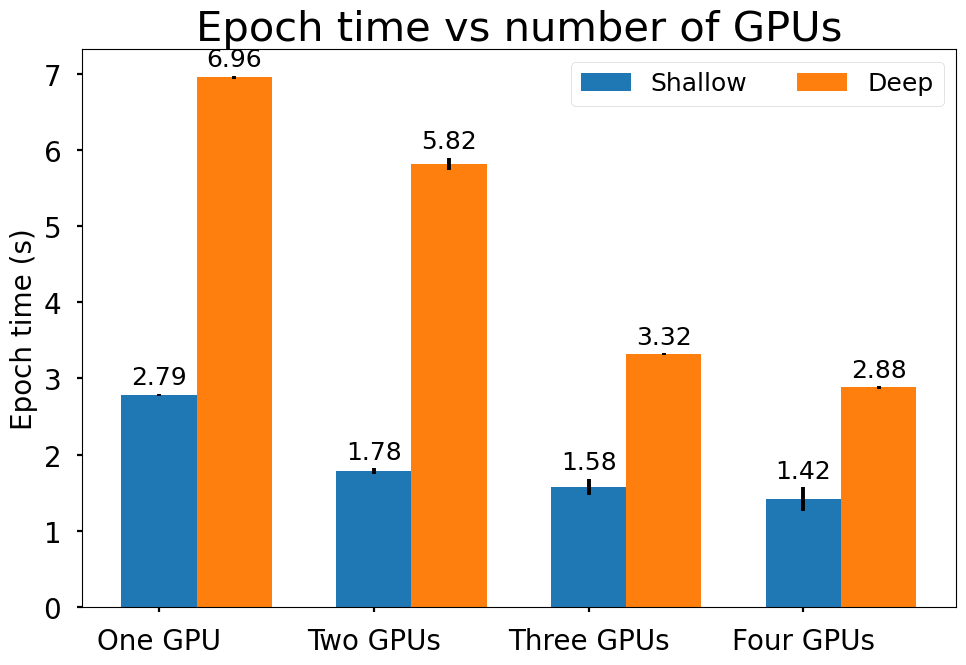

In [6]:
x = np.arange(len(gpus))
width = 0.35
multiplier = 0

plt.style.use('seaborn-v0_8-poster')

fig, ax = plt.subplots(figsize=(10, 7), layout='constrained')

plt.rcParams.update({'font.size': 18})

for label, data in times.items():
  offset = width * multiplier
  means = [np.mean(d) for d in data]
  stds = [np.std(d) for d in data]

  rects = ax.bar(x + offset, means, width, label=label, yerr=stds, capsize=5)
  ax.bar_label(rects, padding=3, fmt='%.2f', fontsize=18)
  multiplier += 1

ax.set_ylabel('Epoch time (s)', fontsize=20)
ax.set_title('Epoch time vs number of GPUs', fontsize=30)
ax.set_xticks(x + width)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.legend(loc='upper right', ncols=2, fontsize=18)

plt.xticks(ticks=x, labels=gpus)

plt.tight_layout()
plt.show()

/tmp/ipykernel_14679/3638388977.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


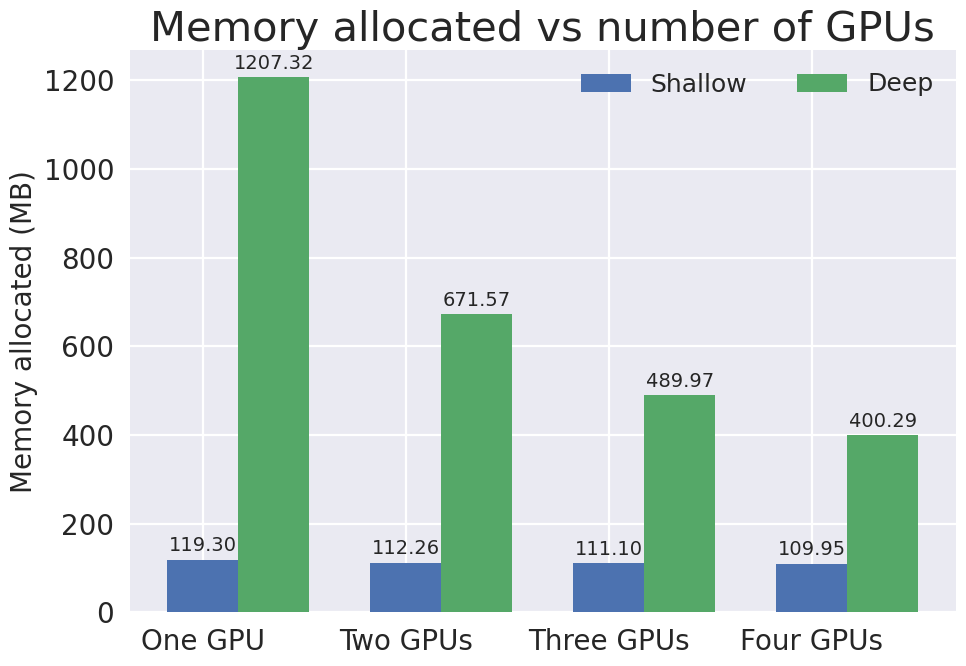

In [14]:
x = np.arange(len(gpus))
width = 0.35
multiplier = 0

plt.style.use('seaborn-v0_8-poster')

fig, ax = plt.subplots(figsize=(10, 7), layout='constrained')

plt.rcParams.update({'font.size': 18})

for label, data in mems.items():
  offset = width * multiplier
  means = [np.mean(d) for d in data]
  stds = [np.std(d) for d in data]

  rects = ax.bar(x + offset, means, width, label=label, yerr=stds, capsize=5)
  ax.bar_label(rects, padding=3, fmt='%.2f', fontsize=14)
  multiplier += 1

ax.set_ylabel('Memory allocated (MB)', fontsize=20)
ax.set_title('Memory allocated vs number of GPUs', fontsize=30)
ax.set_xticks(x + width)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.legend(loc='upper right', ncols=2, fontsize=18)

plt.xticks(ticks=x, labels=gpus)

plt.tight_layout()
plt.show()